In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directory where the TensorBoard logs are stored
log_dir = os.getcwd()

run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

In [5]:
for f in run_folders:
    if ('lambda0_' in f):
        lambda0 = f
    elif('lambda0.95_' in f):
        lambda095 = f
    elif('lambda0.98_' in f):
        lambda098 = f
    elif('lambda0.99_' in f):
        lambda099 = f
    else:
        lambda1 = f

## Generali Advantages Estimation

### Experiment: LunarLander
Plot Evaluation Average Return against # of environment steps


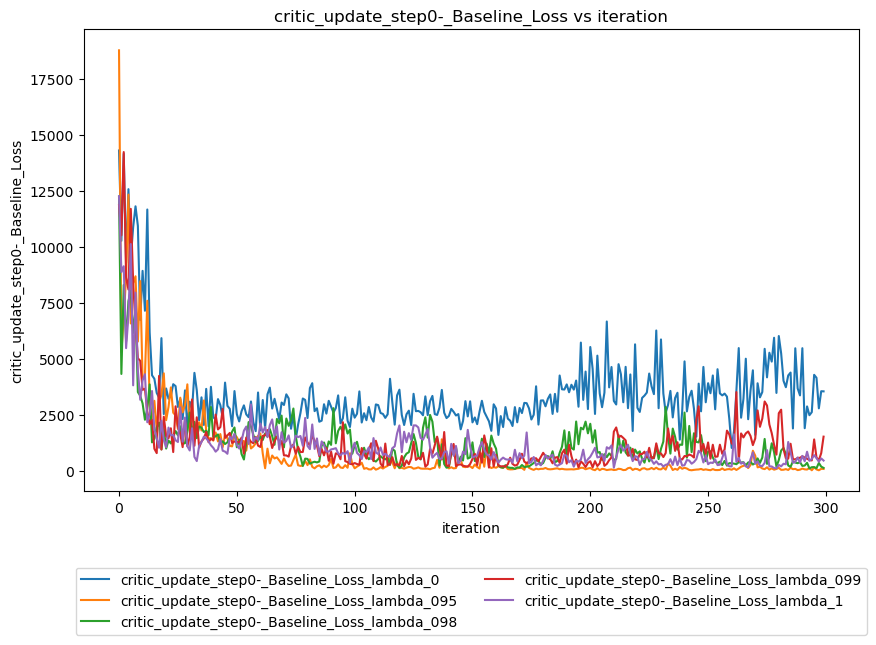

In [14]:
plt.figure(figsize=(10, 6))
event_acc0 = EventAccumulator(lambda0)
event_acc095 = EventAccumulator(lambda095)
event_acc098 = EventAccumulator(lambda098)
event_acc099 = EventAccumulator(lambda099)
event_acc1 = EventAccumulator(lambda1)
event_acc0.Reload()
event_acc095.Reload()
event_acc098.Reload()
event_acc099.Reload()
event_acc1.Reload()
    # Extracting values to plot

steps = np.array([int(s.step) for s in event_acc0.Scalars('Train_EnvstepsSoFar')])
Baseline_Loss0 = np.array([s.value for s in event_acc0.Scalars('critic_update_step0-_Baseline_Loss')])
Baseline_Loss095 = np.array([s.value for s in event_acc095.Scalars('critic_update_step0-_Baseline_Loss')])
Baseline_Loss098 = np.array([s.value for s in event_acc098.Scalars('critic_update_step0-_Baseline_Loss')])
Baseline_Loss099 = np.array([s.value for s in event_acc099.Scalars('critic_update_step0-_Baseline_Loss')])
Baseline_Loss1 = np.array([s.value for s in event_acc1.Scalars('critic_update_step0-_Baseline_Loss')])
plt.plot(steps, Baseline_Loss0, label='critic_update_step0-_Baseline_Loss_lambda_0')
plt.plot(steps, Baseline_Loss095, label='critic_update_step0-_Baseline_Loss_lambda_095')
plt.plot(steps, Baseline_Loss098, label='critic_update_step0-_Baseline_Loss_lambda_098')
plt.plot(steps, Baseline_Loss099, label='critic_update_step0-_Baseline_Loss_lambda_099')
plt.plot(steps, Baseline_Loss1, label='critic_update_step0-_Baseline_Loss_lambda_1')


# Adding legends, labels and title
#plt.axhline(y=180,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('critic_update_step0-_Baseline_Loss')
plt.title('critic_update_step0-_Baseline_Loss vs iteration')

# Show plot
plt.show()

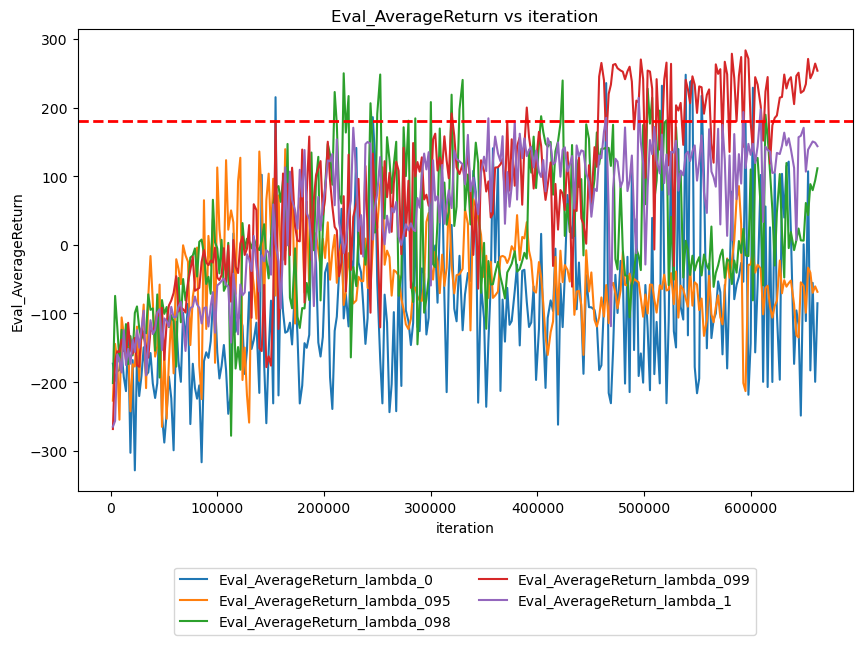

In [13]:
plt.figure(figsize=(10, 6))
steps = np.array([int(s.value) for s in event_acc0.Scalars('Train_EnvstepsSoFar')])
return0 = np.array([s.value for s in event_acc0.Scalars('Eval_AverageReturn')])
return095 = np.array([s.value for s in event_acc095.Scalars('Eval_AverageReturn')])
return098 = np.array([s.value for s in event_acc098.Scalars('Eval_AverageReturn')])
return099 = np.array([s.value for s in event_acc099.Scalars('Eval_AverageReturn')])
return1 = np.array([s.value for s in event_acc1.Scalars('Eval_AverageReturn')])
plt.plot(steps, return0, label='Eval_AverageReturn_lambda_0')
plt.plot(steps, return095, label='Eval_AverageReturn_lambda_095')
plt.plot(steps, return098, label='Eval_AverageReturn_lambda_098')
plt.plot(steps, return099, label='Eval_AverageReturn_lambda_099')
plt.plot(steps, return1, label='Eval_AverageReturn_lambda_1')


# Adding legends, labels and title
plt.axhline(y=180,color='r', linestyle='--', linewidth=2)  
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('iteration')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs iteration')

# Show plot
plt.show()

Maybe lambda equaling to 0.99 is the best